In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [3]:
date_range = pd.date_range(start='2011-01-01 10:15:00', end='2012-01-01 10:15:00', freq='H')

In [4]:
times =  pd.DataFrame(data={'value': np.random.randint(low=0, high=2, size=len(date_range)),
                            'value2':np.random.randint(low=0, high=2, size=len(date_range))}, index = date_range)

In [5]:
times.head()

,value,value2
2011-01-01 10:15:00,1,1
2011-01-01 11:15:00,0,0
2011-01-01 12:15:00,1,1
2011-01-01 13:15:00,1,0
2011-01-01 14:15:00,1,1


# Single Sensor

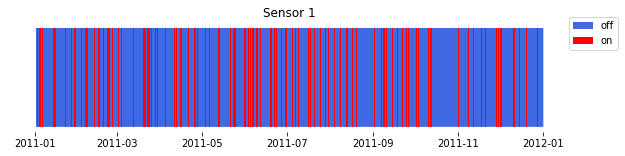

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))

ax.fill_between(times.index, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
ax.fill_between(times.index, where = (times['value'] == 1), y1=0, y2=1, facecolor = 'red' , label = 'on')
ax.set_title('Sensor 1')
ax.set_yticks([])
ax.set_frame_on(False)
plt.legend(loc=(1, 0.75));

# Multiple Sensors

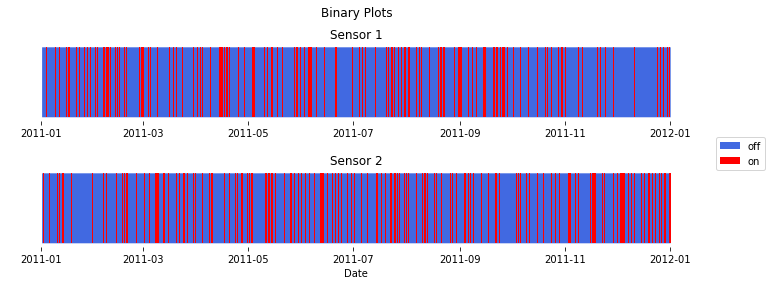

In [7]:
fig, axarr = plt.subplots(2, 1, figsize=(10, 4))

axarr[0].fill_between(times.index, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
axarr[0].fill_between(times.index, where = (times['value'] == 1), y1=0, y2=1, facecolor = 'red' , label = 'on')
axarr[0].set_title('Sensor 1')
axarr[0].set_yticks([])
axarr[0].set_frame_on(False)

axarr[1].fill_between(times.index, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
axarr[1].fill_between(times.index, where = (times['value2'] == 1), y1=0, y2=1, facecolor = 'red' , label = 'on')
axarr[1].set_title('Sensor 2')
axarr[1].set_yticks([])
axarr[1].set_frame_on(False)


plt.legend(loc=(1.02, 1))
plt.xlabel('Date'); plt.yticks([])
plt.tight_layout(h_pad = 2)
fig.subplots_adjust(top = 0.85)
plt.suptitle('Binary Plots');

# Real Data

In [8]:
# Read in data
times = pd.read_csv('data/binary_data.csv')

# Set a date time index for resampling
times.set_index(['last_changed'], drop =True, inplace=True)
times.index = pd.to_datetime(times.index)

# Resample to seconds and forwardfill data
# Using seconds for resample frequency here
times_resampled = times.resample('s', fill_method='ffill')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  # Remove the CWD from sys.path while we load stuff.


In [9]:
times_resampled.head()

,value
last_changed,
2017-12-25 07:30:00,NaN
2017-12-25 07:30:01,0.0
2017-12-25 07:30:02,0.0
2017-12-25 07:30:03,0.0
2017-12-25 07:30:04,0.0


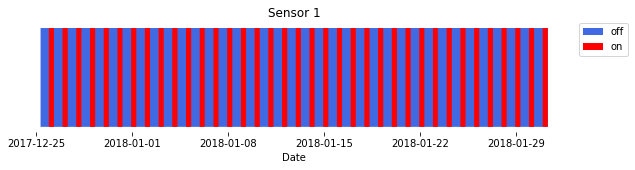

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))

ax.fill_between(times_resampled.index, y1=0, y2=1, facecolor='royalblue', label='off')
ax.fill_between(times_resampled.index, y1=0, y2=1, where = (times_resampled['value'] > 0), facecolor='red', label='on')
ax.set_title('Sensor 1')
ax.set_xlabel('Date')
ax.set_frame_on(False)
ax.set_yticks([])
plt.legend(loc=(1.01, 0.7)); plt.show()